In [4]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
print(train_labels.dtype)


int64


In [12]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(y_train.dtype)


float32


In [13]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [17]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [18]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5115 - acc: 0.8044 - val_loss: 0.3893 - val_acc: 0.8633
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3127 - acc: 0.8969 - val_loss: 0.3096 - val_acc: 0.8875
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2278 - acc: 0.9261 - val_loss: 0.2864 - val_acc: 0.8875
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1786 - acc: 0.9416 - val_loss: 0.2906 - val_acc: 0.8854
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1474 - acc: 0.9518 - val_loss: 0.2922 - val_acc: 0.8834
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1173 - acc: 0.9659 - val_loss: 0.2997 - val_acc: 0.8863
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0971 - acc: 0.9720 - val_loss: 0.3080 - val_acc: 0.8862
Epoch 8/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0780 - a

In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

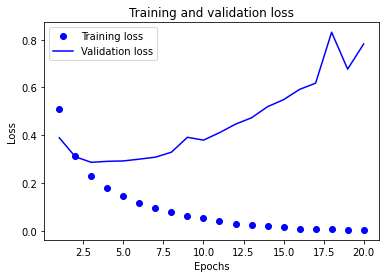

In [21]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

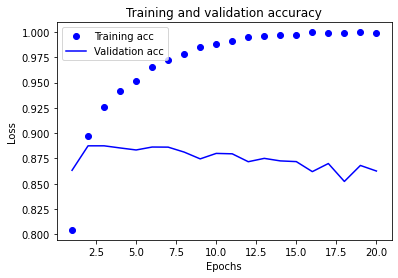

In [23]:
plt.clf() #clears figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 15ms/step - loss: 0.4598 - accuracy: 0.8233
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2611 - accuracy: 0.9085
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2001 - accuracy: 0.9295
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2912 - accuracy: 0.8846


In [26]:
model.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.20449756],
       [0.99967724],
       [0.9128725 ],
       ...,
       [0.1012952 ],
       [0.07092664],
       [0.5633468 ]], dtype=float32)